In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df['track_name'] = df['track_name'].astype(str)
analyzer = SentimentIntensityAnalyzer()
def sentiment_analysis(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']
df['sentiment_score'] = df['track_name'].apply(sentiment_analysis)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))
print(df['sentiment'].value_counts())

neutral     88442
positive    15317
negative    10241
Name: sentiment, dtype: int64


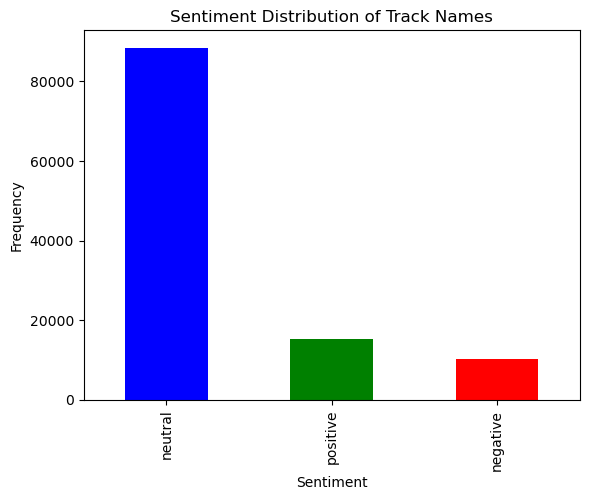

In [3]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Distribution of Track Names')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

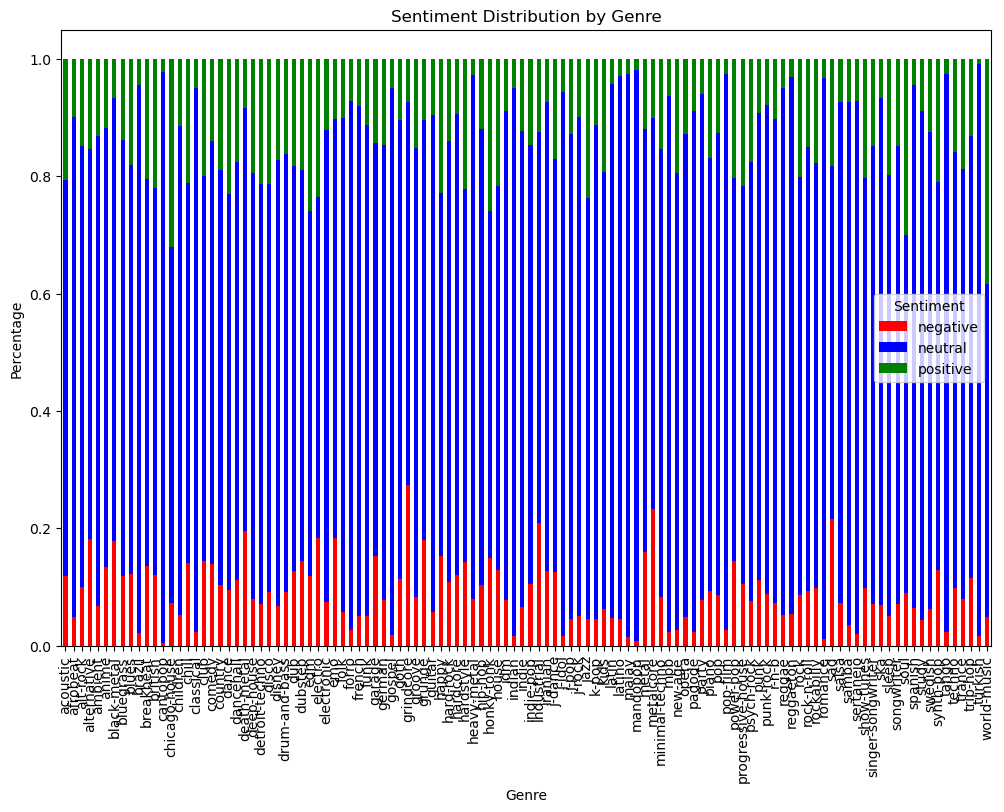

In [4]:
genre_sentiment = df.groupby(['track_genre', 'sentiment']).size().unstack().fillna(0)
genre_sentiment_norm = genre_sentiment.div(genre_sentiment.sum(axis=1), axis=0)
genre_sentiment_norm.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.show()

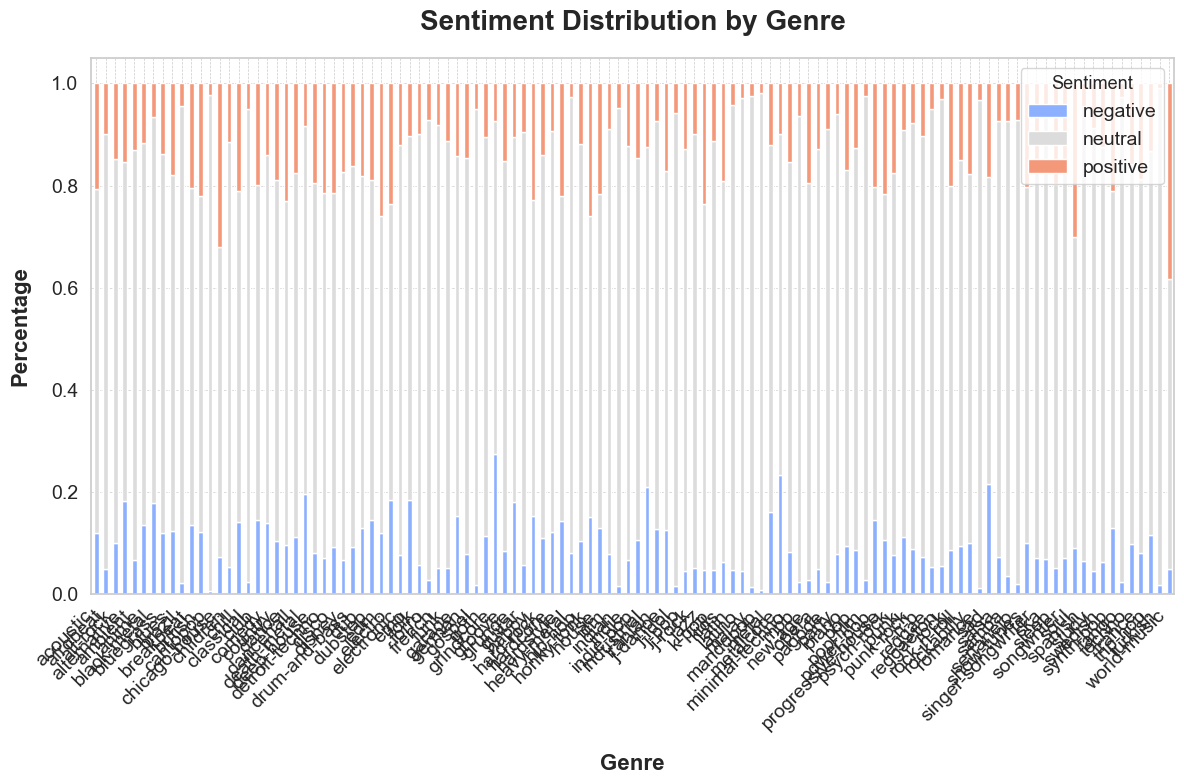

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

genre_sentiment = df.groupby(['track_genre', 'sentiment']).size().unstack().fillna(0)

genre_sentiment_norm = genre_sentiment.div(genre_sentiment.sum(axis=1), axis=0)

sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(genre_sentiment.columns))

fig, ax = plt.subplots(figsize=(12, 8))
genre_sentiment_norm.plot(kind='bar', stacked=True, color=palette, ax=ax)
ax.set_title('Sentiment Distribution by Genre', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Genre', fontsize=16, weight='bold', labelpad=15)
ax.set_ylabel('Percentage', fontsize=16, weight='bold', labelpad=15)
ax.legend(title='Sentiment', fontsize=14, title_fontsize='13', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


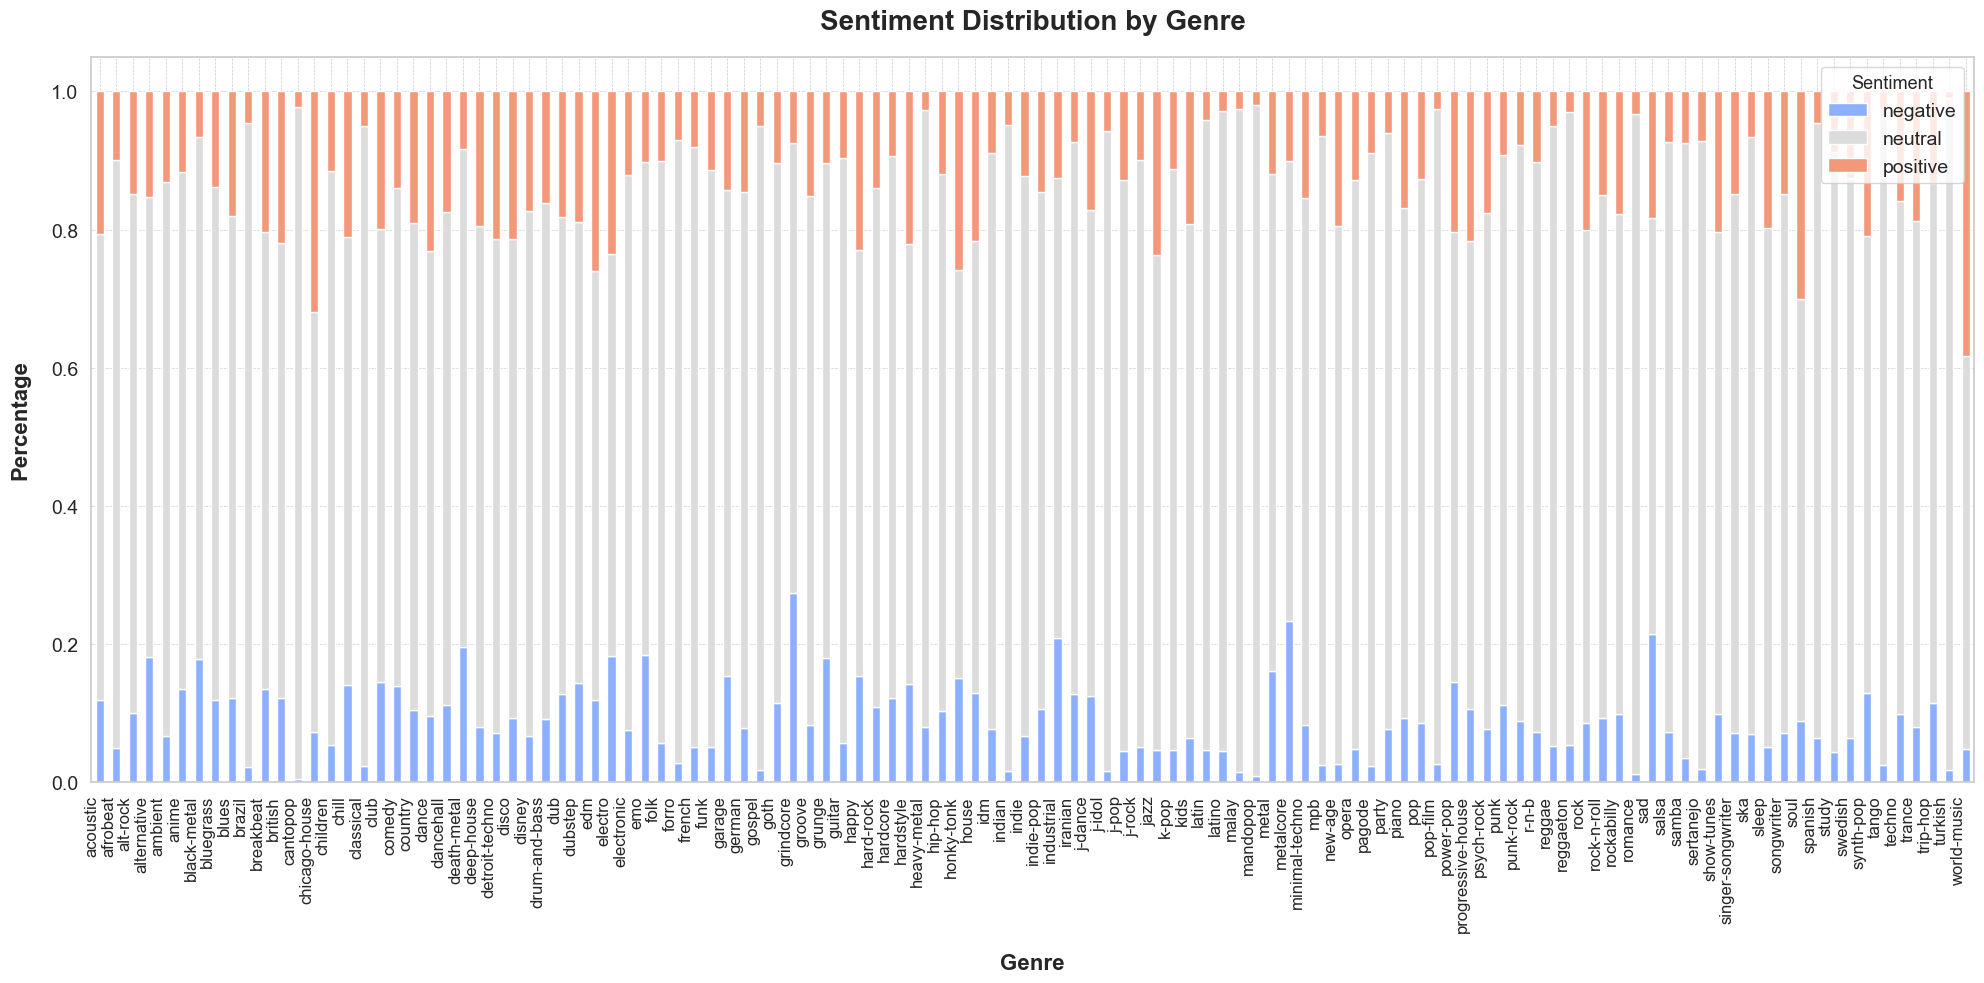

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

genre_sentiment = df.groupby(['track_genre', 'sentiment']).size().unstack().fillna(0)

genre_sentiment_norm = genre_sentiment.div(genre_sentiment.sum(axis=1), axis=0)

sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(genre_sentiment.columns))

fig, ax = plt.subplots(figsize=(20, 10))  # Increased width
genre_sentiment_norm.plot(kind='bar', stacked=True, color=palette, ax=ax)
ax.set_title('Sentiment Distribution by Genre', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Genre', fontsize=16, weight='bold', labelpad=15)
ax.set_ylabel('Percentage', fontsize=16, weight='bold', labelpad=15)
ax.legend(title='Sentiment', fontsize=14, title_fontsize='13', loc='upper right')
plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotated labels
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [7]:
import altair as alt

genre_sentiment_norm_reset = genre_sentiment_norm.reset_index().melt(id_vars='track_genre', var_name='Sentiment', value_name='Percentage')

chart = alt.Chart(genre_sentiment_norm_reset).mark_bar().encode(
    x=alt.X('track_genre:O', title='Genre', axis=alt.Axis(labelAngle=90)),  # Rotated labels
    y=alt.Y('Percentage:Q', title='Percentage'),
    color=alt.Color('Sentiment:N', scale=alt.Scale(domain=genre_sentiment.columns.tolist(), 
                                                  range=sns.color_palette("coolwarm", len(genre_sentiment.columns)).as_hex())),
    tooltip=['track_genre', 'Sentiment', alt.Tooltip('Percentage', format='.2%')]
).properties(
    title='Sentiment Distribution by Genre',
    width=800,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14,
    grid=True
).configure_title(
    fontSize=20,
    anchor='start',
    fontWeight='bold'
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
).interactive()

scrollable_chart = chart.configure_view(
    continuousHeight=400,
    continuousWidth=800
).properties(
    width=alt.Step(40)
)

scrollable_chart.display()


alt.Chart(...)

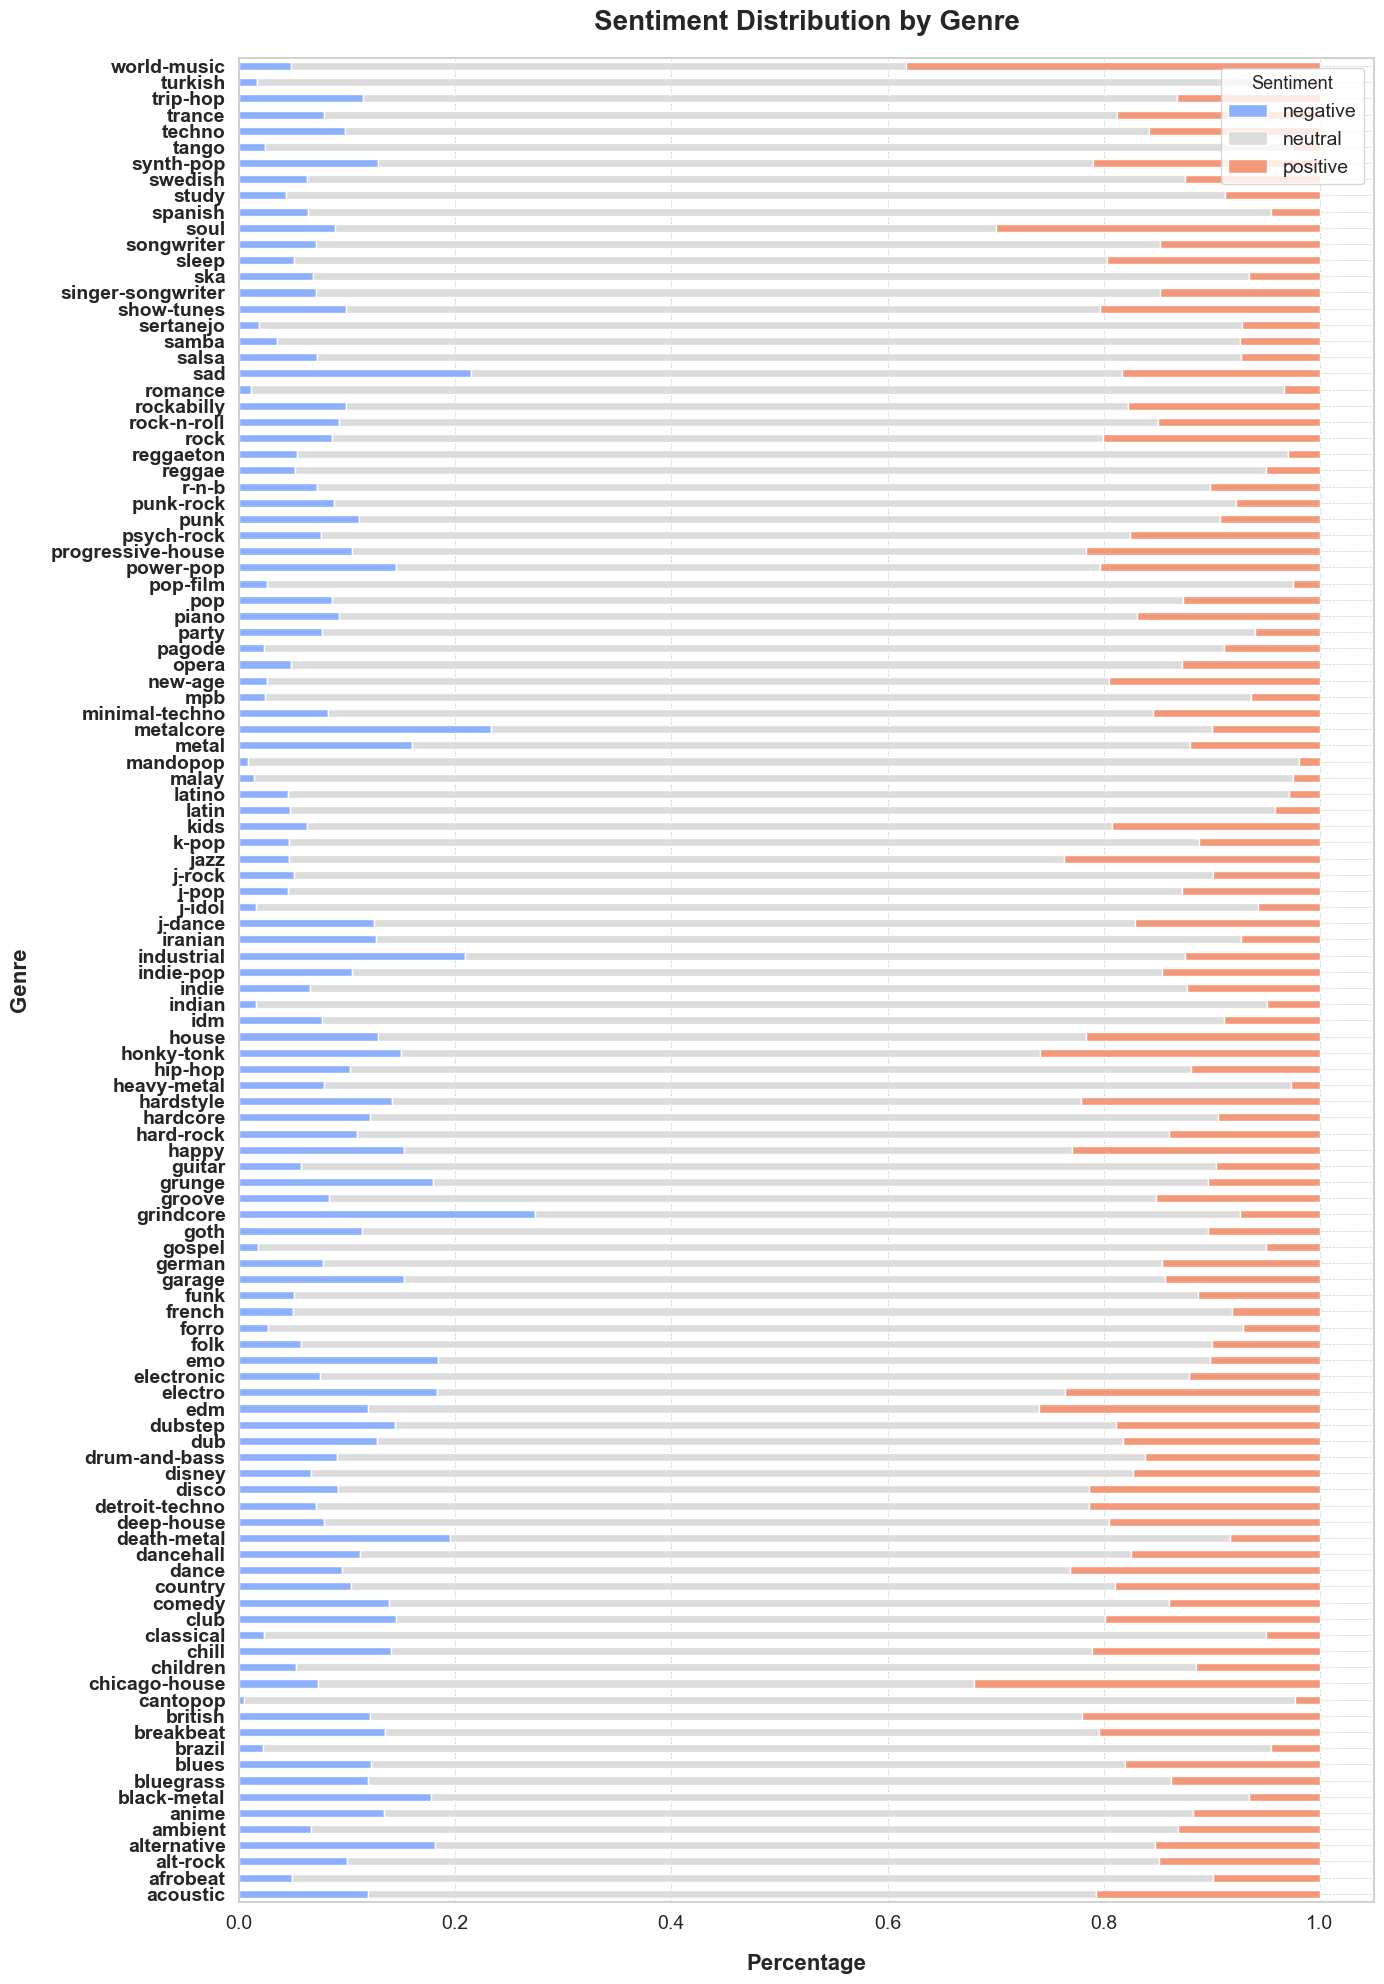

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

genre_sentiment = df.groupby(['track_genre', 'sentiment']).size().unstack().fillna(0)
genre_sentiment_norm = genre_sentiment.div(genre_sentiment.sum(axis=1), axis=0)

sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(genre_sentiment.columns))

fig, ax = plt.subplots(figsize=(14, 20))  # Increased height
genre_sentiment_norm.plot(kind='barh', stacked=True, color=palette, ax=ax)
ax.set_title('Sentiment Distribution by Genre', fontsize=20, weight='bold', pad=20)
ax.set_ylabel('Genre', fontsize=16, weight='bold', labelpad=15)  # Switched axes
ax.set_xlabel('Percentage', fontsize=16, weight='bold', labelpad=15)
ax.legend(title='Sentiment', fontsize=14, title_fontsize='13', loc='upper right')
plt.yticks(fontsize=14, weight='bold')  # Enlarged  titles
plt.xticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [9]:
import altair as alt

genre_sentiment_norm_reset = genre_sentiment_norm.reset_index().melt(id_vars='track_genre', var_name='Sentiment', value_name='Percentage')

chart = alt.Chart(genre_sentiment_norm_reset).mark_bar().encode(
    y=alt.Y('track_genre:O', title='Genre', axis=alt.Axis(labelFontSize=14, titleFontSize=16, titleFontWeight='bold')),
    x=alt.X('Percentage:Q', title='Percentage'),
    color=alt.Color('Sentiment:N', scale=alt.Scale(domain=genre_sentiment.columns.tolist(), 
                                                  range=sns.color_palette("coolwarm", len(genre_sentiment.columns)).as_hex())),
    tooltip=['track_genre', 'Sentiment', alt.Tooltip('Percentage', format='.2%')]
).properties(
    title='Sentiment Distribution by Genre',
    width=600,
    height=800  # Increased height
).configure_axis(
    labelFontSize=14,
    titleFontSize=16,
    grid=True
).configure_title(
    fontSize=20,
    anchor='start',
    fontWeight='bold'
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
).interactive()

chart.display()


alt.Chart(...)

In [10]:
import altair as alt
genre_sentiment = df.groupby(['track_genre', 'sentiment']).size().unstack().fillna(0)
genre_sentiment_norm = genre_sentiment.div(genre_sentiment.sum(axis=1), axis=0)
genre_sentiment_norm_reset = genre_sentiment_norm.reset_index().melt(id_vars='track_genre', var_name='Sentiment', value_name='Percentage')
chart = alt.Chart(genre_sentiment_norm_reset).mark_bar().encode(
    y=alt.Y('track_genre:O', title='Genre', axis=alt.Axis(labelFontSize=14, titleFontSize=16, titleFontWeight='bold'), bandPosition=0.5),
    x=alt.X('Percentage:Q', title='Percentage'),
    color=alt.Color('Sentiment:N', scale=alt.Scale(domain=genre_sentiment.columns.tolist(), 
                                                  range=sns.color_palette("coolwarm", len(genre_sentiment.columns)).as_hex())),
    tooltip=['track_genre', 'Sentiment', alt.Tooltip('Percentage', format='.2%')]
).properties(
    title='Sentiment Distribution by Genre',
    width=600,
    height=1200  # Further increased height
).configure_axis(
    labelFontSize=14,
    titleFontSize=16,
    grid=True
).configure_title(
    fontSize=20,
    anchor='start',
    fontWeight='bold'
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
).interactive()
chart.display()


alt.Chart(...)

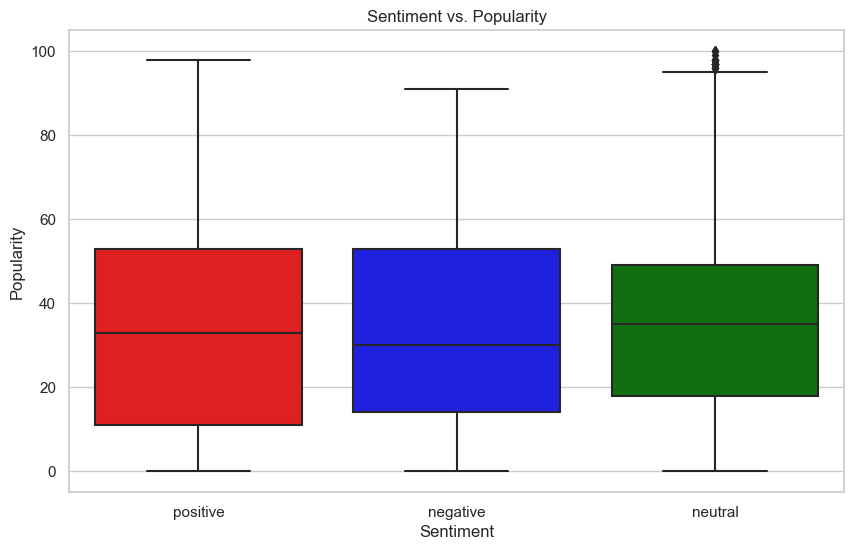

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='popularity', data=df, palette=['red', 'blue', 'green'])
plt.title('Sentiment vs. Popularity')
plt.xlabel('Sentiment')
plt.ylabel('Popularity')
plt.show()


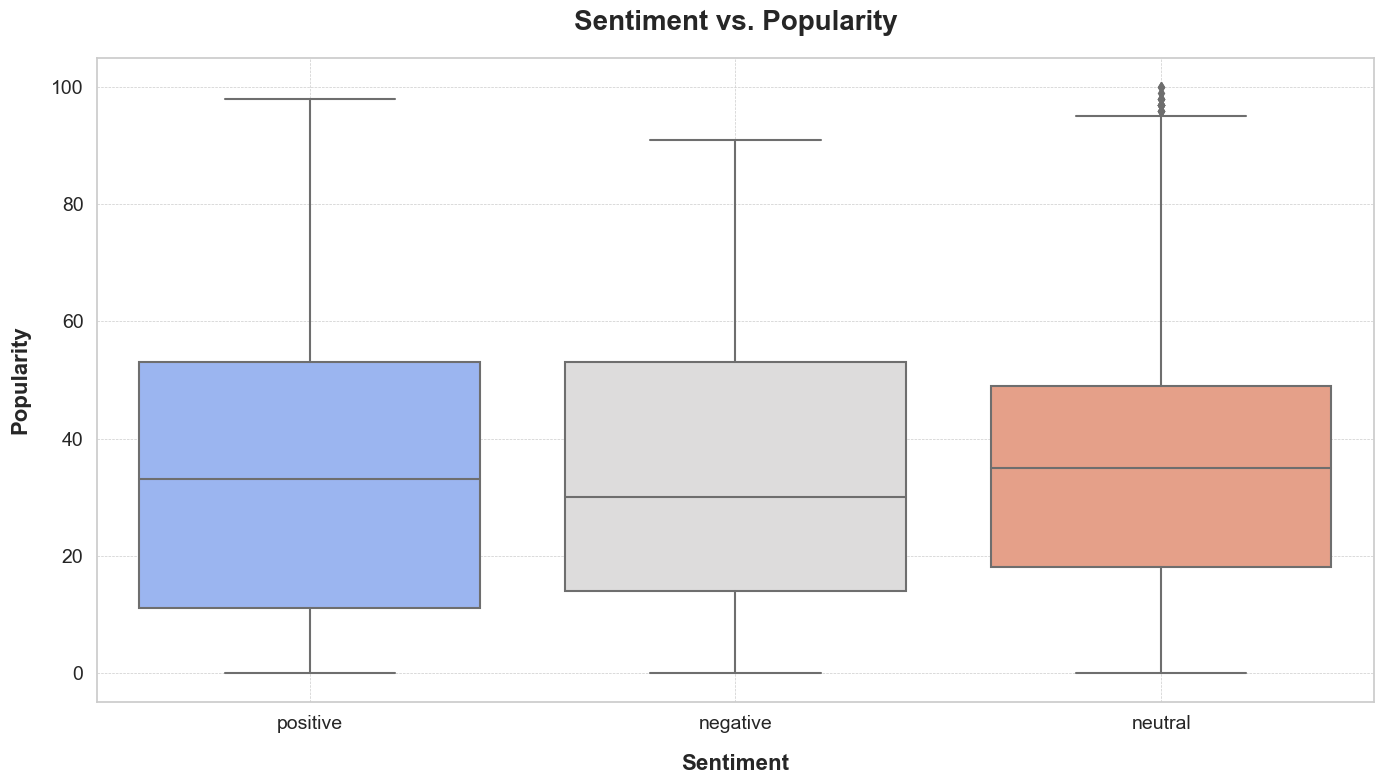

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))  
palette = sns.color_palette("coolwarm", 3) 
ax = sns.boxplot(x='sentiment', y='popularity', data=df, palette=palette)
ax.set_title('Sentiment vs. Popularity', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Sentiment', fontsize=16, weight='bold', labelpad=15)
ax.set_ylabel('Popularity', fontsize=16, weight='bold', labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [13]:
import altair as alt
import pandas as pd
alt.data_transformers.enable('vegafusion')
chart = alt.Chart(df).mark_boxplot().encode(
    x=alt.X('sentiment:O', title='Sentiment', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('popularity:Q', title='Popularity'),
    color=alt.Color('sentiment:N', scale=alt.Scale(domain=['Positive', 'Neutral', 'Negative'], 
                                                  range=['#67a9cf', '#ef8a62', '#fddbc7'])),
    tooltip=['sentiment', 'popularity']
).properties(
    title='Sentiment vs. Popularity',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14,
    grid=True
).configure_title(
    fontSize=20,
    anchor='start',
    fontWeight='bold'
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
chart.interactive().display()


alt.Chart(...)

In [14]:
import altair as alt
import pandas as pd
alt.data_transformers.enable('vegafusion')
chart = alt.Chart(df).mark_boxplot().encode(
    x=alt.X('sentiment:O', title='Sentiment', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('popularity:Q', title='Popularity'),
    color=alt.Color('sentiment:N', scale=alt.Scale(domain=['Positive', 'Neutral', 'Negative'], 
                                                  range=['#67a9cf', '#ef8a62', '#fddbc7'])),
    tooltip=['sentiment', 'popularity']
).properties(
    title='Sentiment vs. Popularity',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14,
    grid=True
).configure_title(
    fontSize=20,
    anchor='start',
    fontWeight='bold'
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
chart.interactive().display()


alt.Chart(...)

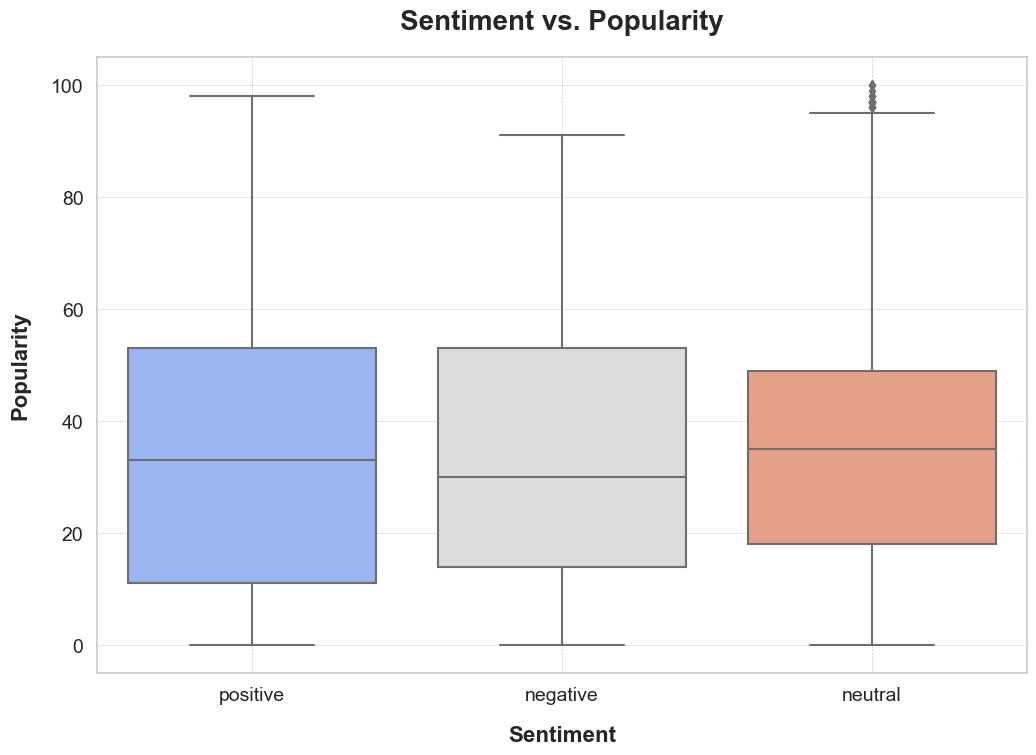

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
palette = sns.color_palette("coolwarm", 3)
ax = sns.boxplot(x='sentiment', y='popularity', data=df, palette=palette)
ax.set_title('Sentiment vs. Popularity', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Sentiment', fontsize=16, weight='bold', labelpad=15)
ax.set_ylabel('Popularity', fontsize=16, weight='bold', labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [16]:
import altair as alt
import pandas as pd
chart = alt.Chart(df).mark_boxplot(extent='min-max').encode(
    x=alt.X('sentiment:O', title='Sentiment', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('popularity:Q', title='Popularity'),
    color=alt.Color('sentiment:N', scale=alt.Scale(domain=['Positive', 'Neutral', 'Negative'], 
                                                  range=['#67a9cf', '#ef8a62', '#fddbc7'])),
    tooltip=['sentiment', 'popularity']
).properties(
    title='Sentiment vs. Popularity',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14,
    grid=True
).configure_title(
    fontSize=20,
    anchor='start',
    fontWeight='bold'
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)

chart.interactive()


alt.Chart(...)

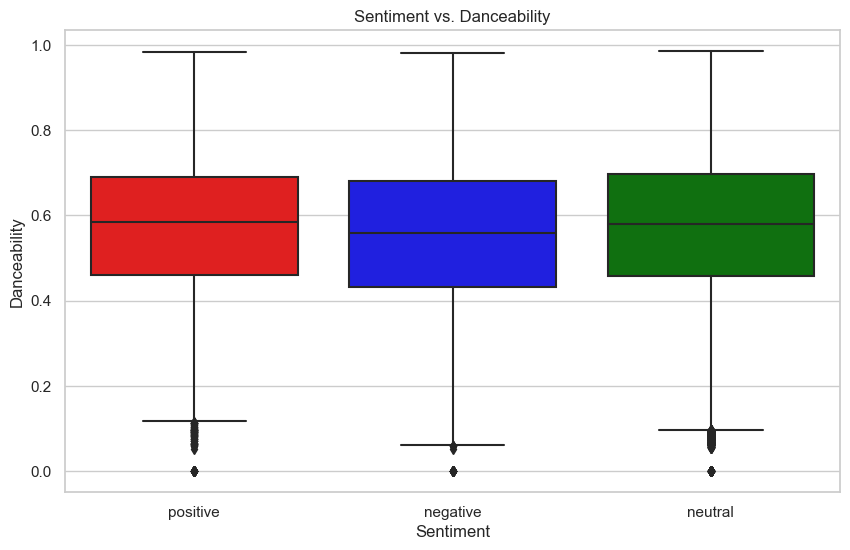

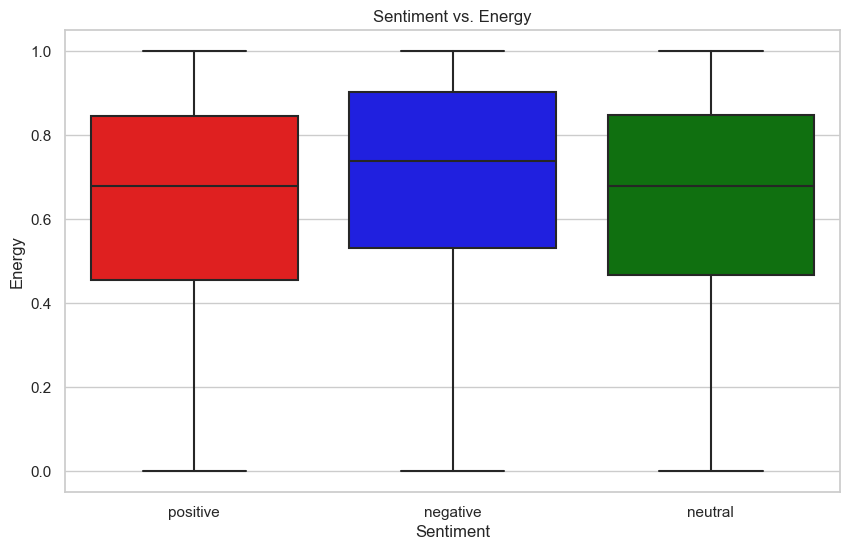

In [17]:
# Plot sentiment vs. danceability
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='danceability', data=df, palette=['red', 'blue', 'green'])
plt.title('Sentiment vs. Danceability')
plt.xlabel('Sentiment')
plt.ylabel('Danceability')
plt.show()

# Plot sentiment vs. energy
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='energy', data=df, palette=['red', 'blue', 'green'])
plt.title('Sentiment vs. Energy')
plt.xlabel('Sentiment')
plt.ylabel('Energy')
plt.show()
